In [2]:
import Bio.Entrez as Entrez
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define the list of organisms to search for
org_search = ['Zea mays', 'Arabidopsis thaliana', 'Oryza sativa']

# Set your NCBI email address
Entrez.email = 'your_email@example.com'

# Specify the range of years
start_year = 2008
end_year = 2023

In [8]:
handle = Entrez.einfo(db="sra")
record = Entrez.read(handle)
handle.close()

In [26]:
# Extract searchable items
searchable_items = record['DbInfo']['FieldList']
# Create a DataFrame
df = pd.DataFrame(searchable_items)

In [33]:
df.head()

,Name,FullName,Description,TermCount,IsDate,IsNumerical,SingleToken,Hierarchy,IsHidden
0,ALL,All Fields,All terms from all searchable fields,240745059,N,N,N,N,N
1,UID,UID,Unique number assigned to publication,0,N,Y,Y,N,Y
2,FILT,Filter,Limits the records,100,N,N,Y,N,N
3,ACCN,Accession,Accession number of sequence,100394439,N,N,N,N,N
4,TITL,Title,Words in definition line,17049507,N,N,N,N,N


In [8]:
def count_seq_libraries(org, seq_type, year):
    if seq_type == 'DNA':
        query = f'"{org}"[Organism] "GENOMIC" [Source] AND {year}[Publication Date]'
    elif seq_type == 'RNA':
        query = f'"{org}"[Organism] "RNA-Seq" [STRA] AND {year}[Publication Date]'
    else:
        raise ValueError("Invalid sequence type. Must be either 'DNA' or 'RNA'.")
    
    handle = Entrez.esearch(db='sra', term=query)
    record = Entrez.read(handle)
    count = int(record['Count'])
    handle.close()
    return count

def get_seq_library_counts(org_search, start_year, end_year, seq_type):
    library_counts = []
    for year in range(start_year, end_year + 1):
        for org in org_search:
            count = count_seq_libraries(org, seq_type, year)
            library_counts.append([org, year, count])
    return pd.DataFrame(library_counts, columns=['Species', 'Year', 'Count'])

                 Species  Year  Count
0               Zea mays  2008      0
1   Arabidopsis thaliana  2008      0
2           Oryza sativa  2008      0
3               Zea mays  2009     52
4   Arabidopsis thaliana  2009     24
..                   ...   ...    ...
43  Arabidopsis thaliana  2022  21265
44          Oryza sativa  2022   6176
45              Zea mays  2023   4527
46  Arabidopsis thaliana  2023   6015
47          Oryza sativa  2023   1339

[96 rows x 3 columns]


In [ ]:
# Get the DNA library counts as a Pandas table
dna_library_counts = get_seq_library_counts(org_search, start_year, end_year, 'DNA')

# Get the RNA library counts as a Pandas table
rna_library_counts = get_seq_library_counts(org_search, start_year, end_year, 'RNA')

# Merge the DNA and RNA library counts
library_counts = pd.concat([dna_library_counts, rna_library_counts])

# Print the resulting library counts table
print(library_counts)

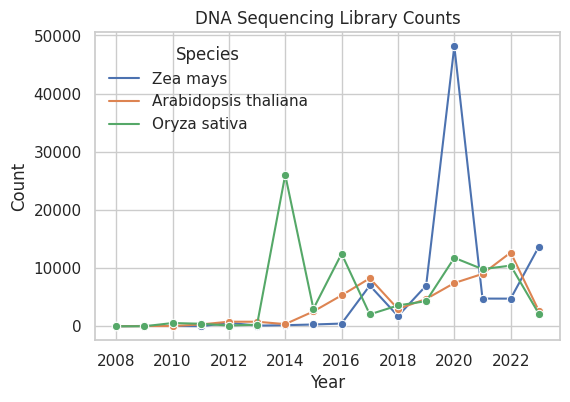

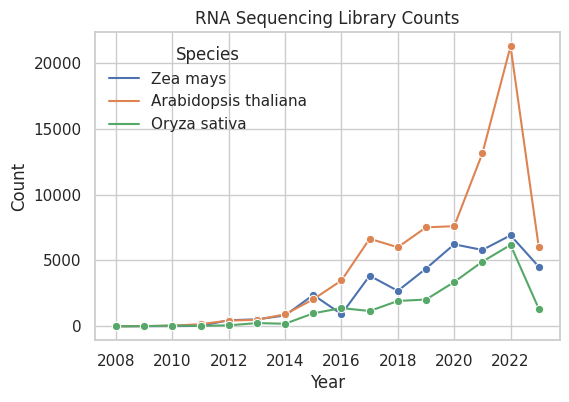

In [22]:
# Plot the library_counts
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.lineplot(data=dna_library_counts, x='Year', y='Count', hue='Species', marker='o')
plt.title('DNA Sequencing Library Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Species')

plt.figure(figsize=(6, 4))
sns.lineplot(data=rna_library_counts, x='Year', y='Count', hue='Species', marker='o')
plt.title('RNA Sequencing Library Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Species')

plt.show()

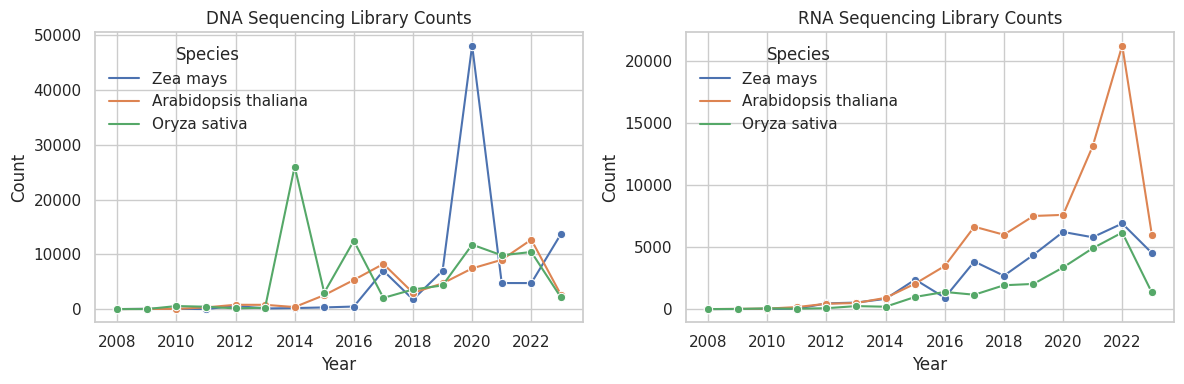

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn plot theme
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot DNA library counts on the left subplot
sns.lineplot(data=dna_library_counts, x='Year', y='Count', hue='Species', marker='o', ax=axes[0])
axes[0].set_title('DNA Sequencing Library Counts')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')
axes[0].legend(title='Species')

# Plot RNA library counts on the right subplot
sns.lineplot(data=rna_library_counts, x='Year', y='Count', hue='Species', marker='o', ax=axes[1])
axes[1].set_title('RNA Sequencing Library Counts')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')
axes[1].legend(title='Species')

plt.tight_layout()
plt.show()
